# Linear Regression From Scratch
In this notebook you will implement linear regression using the least squares method.

The notebook will guide you in the general steps. You may use only numpy, pandas, and matplotlib for this exercise.

#### Math Background
The task is to solve linear regression for the data set of ```x``` and ```y```. That is, fit a line y to the data such that ```y = a + bx + e```. Where a and b are coefficents and e is an error term.

We know that ```b = SUM ( xi - x_mean) * (yi - y_mean) / SUM (xi - x_mean)^2``` where ```xi```, and ```yi``` are the indivdual observations and ```x_mean```, ```y_mean``` are means of all ```xi``` and ```yi```.

So a reasonable solution then for a fit is ```a = y_mean - b * x_mean```.


#### Implementation Steps
1. Load the file ```reg_data.csv```
2. Display the data with a scatter plot. Write a markdown cell and comment on the structure of the data and what kind of line you think will fit the data. 
3. Implement a function of the least squares method.
4. Plot the predictions from your function.
5. Comment on the output of your function. Does it make sense? Can it be made better? If yes, how?

In [2]:
#import the minimum packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
#load and inspect the data
df = pd.read_csv("reg_data.csv")
# YOUR CODE HERE

df



,X,Y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
...,...,...
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958


In [4]:
assert df.shape == (100,2)

<AxesSubplot:xlabel='X', ylabel='Y'>

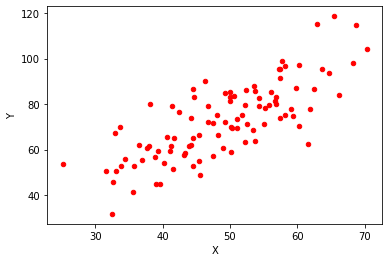

In [9]:
#plot the data (scatter)
# YOUR CODE HERE
# plt.scatter(df.X, df.Y)
# plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':200})
# plt.title('Plot')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.show()
df.plot.scatter(x='X',y='Y', c='red')

In [12]:
# YOUR CODE HERE

x_train, x_test, y_train, y_test = train_test_split(df['X'], df['Y'], train_size=0.8, random_state=0)


In [11]:
assert x_train.shape == (80,)
assert x_test.shape == (20,)
assert y_train.shape == (80,)
assert y_test.shape == (20,)

In [14]:
#implement a least squares function to find a, b

x_mean = np.mean(x_train)
y_mean = np.mean(y_train)
b_upper=0
b_lower=0
for i in range(1,len(x_train)):
    b_upper += ( x_train.values[i] - x_mean) * (y_train.values[i] - y_mean)
    b_lower += ((x_train.values[i] - x_mean)**2)
    


#print(b_upper)

b = b_upper/b_lower
a = y_mean - b * x_mean

# YOUR CODE HERE

print(b)
print(a)


1.3427543674447282
6.800506499819804


In [15]:
assert abs(a - 7.72) <=0.03
assert abs(b - 1.32) <=0.03

AssertionError: 

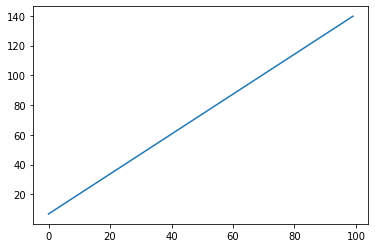

In [18]:
# Lets now plot a line
#1 ways of approaching this problem
# use numpy arange to define the boundaires of the line
# use X train values
#The Y values for the line are computed by
# A+ x*b
line=0
x=np.arange(0,100)
line= a+b*x

plt.plot(line)

In [ ]:
line = 0
x = np.array([])
# YOUR CODE HERE
raise NotImplementedError()

In [19]:
assert abs(a +3*b - 11.69) <= 0.05
assert abs(a +100*b - 140) <= 1

AssertionError: 

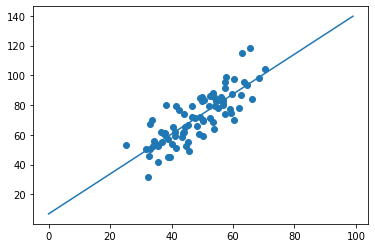

In [22]:
# YOUR CODE HERE
### BEGIN SOLUTION
#We can plot the line with the train data and see how it cuts through it
plt.plot(line)
plt.scatter(x_train,y_train)
#raise NotImplementedError()

In [26]:
#Separate your test data in to classes
#if the Y value for a certain X is lower than the line then the class is 0
class_0 = []
class_1 = []

# YOUR CODE HERE
#raise NotImplementedError()
for i in range(len(x_test)):
    if y_test.values[i] < a+ x_test.values[i]*b: 
        class_0.append((x_test.values[i],y_test.values[i]))
    else:
        class_1.append((x_test.values[i],y_test.values[i]))
        
class_0 = np.array(class_0)
class_1 = np.array(class_1)
print(class_0.shape)
print(class_1.shape)

(11, 2)
(9, 2)


In [31]:
class_0

array([[51.0887199 , 69.58889785],
       [61.53035803, 62.5623823 ],
       [55.0780959 , 71.13972786],
       [43.10782022, 57.81251298],
       [51.08863468, 73.43464155],
       [55.80573336, 79.55043668],
       [58.16847072, 75.39287043],
       [39.29956669, 59.17148932],
       [52.22399609, 63.35879032],
       [47.48120861, 57.25181946],
       [51.84518691, 75.38065167]])

In [ ]:
assert 9 < class_0.shape[0] < 13
assert 7 < class_1.shape[0] < 11

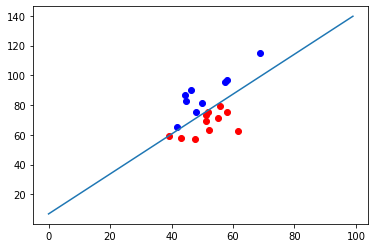

In [30]:
# YOUR CODE HERE
#raise NotImplementedError()
#we can plot the line with each class so we can clearly see the split

### BEGIN SOLUTION
plt.scatter(class_0[:,0],class_0[:,1],c='red')
plt.scatter(class_1[:,0],class_1[:,1],c='blue')
plt.plot(line)

In [32]:
#Get the total error:
#Understanding how regression lines can be used to compute the error
#or in other words a 'loss function' can help clear all the concept
#when in the future you use this functions in ML and DNNs
#we can compute a simple error by simply substracting the real value vs the line value
#we store the absolute value so positives and negatives dont cancel out

err = 0
# YOUR CODE HERE
for i in range(len(x_test)):
    err += abs(y_test.values[i] - (a+ b*x_test.values[i]))
#raise NotImplementedError()
err

201.80000374680543

In [ ]:
assert err - 201 < 20